In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_jkse = pd.read_csv('dataset/jkse.csv', parse_dates=["Date"])
df_jkse.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,6197.871094,6205.895020,6164.833984,6181.174805,6181.174805,52797800.0
1,2019-01-03,6176.151855,6221.009766,6176.151855,6221.009766,6221.009766,72166700.0
2,2019-01-04,6211.096191,6274.540039,6200.854004,6274.540039,6274.540039,80858100.0
3,2019-01-07,6317.625977,6354.757813,6287.224121,6287.224121,6287.224121,90278300.0
4,2019-01-08,6292.263184,6316.240234,6251.375977,6262.847168,6262.847168,90537400.0


In [4]:
df_jkse = df_jkse.drop(columns=['Open','High','Low','Adj Close','Volume'])
df_jkse = df_jkse.rename(columns={'Close': 'JKSE'})
df_jkse.head()

,Date,JKSE
0,2019-01-02,6181.174805
1,2019-01-03,6221.009766
2,2019-01-04,6274.540039
3,2019-01-07,6287.224121
4,2019-01-08,6262.847168


In [5]:
df_jkse['JKSE'].dropna(inplace=True)

<AxesSubplot:>

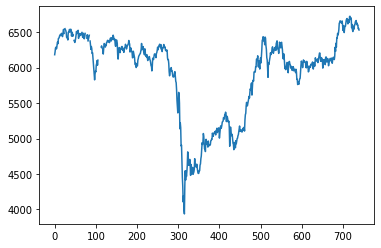

In [6]:
df_jkse['JKSE'].plot()

In [7]:
jkse = df_jkse.copy()

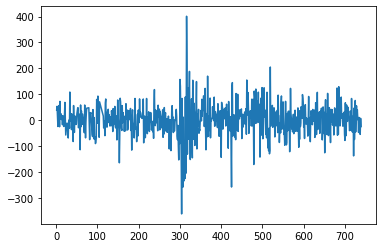

In [ ]:
jkse['JKSE_diff'] = jkse['JKSE'] - jkse['JKSE'].shift(1)
jkse['JKSE_diff'].dropna().plot()

In [8]:
jkse['JKSE_sdiff'] = jkse['JKSE'] - jkse['JKSE'].shift(52)

<AxesSubplot:>

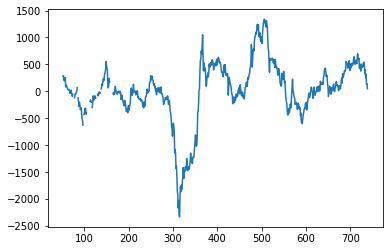

In [9]:
jkse['JKSE_sdiff'].dropna(inplace=True)
jkse['JKSE_sdiff'].plot()

In [ ]:
jkse['JKSE_sdiff'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: JKSE_sdiff, dtype: float64

In [ ]:
jkse['JKSE_log'] = np.log(jkse['JKSE'])
jkse['JKSE_log_diff'] = jkse['JKSE_log'] - jkse['JKSE_log'].shift(1)
jkse['JKSE_log_diff'].dropna(inplace=True)
jkse['JKSE_log_diff'].plot()

In [12]:
jkse.isna().sum()

Date          0
JKSE          0
JKSE_sdiff    0
dtype: int64

In [11]:
jkse.dropna(inplace=True)
jkse

,Date,JKSE,JKSE_sdiff
52,2019-03-15,6461.183105,280.008300
53,2019-03-18,6509.446777,288.437011
54,2019-03-19,6480.275879,205.735840
55,2019-03-20,6482.709961,195.485840
56,2019-03-21,6501.775879,238.928711
...,...,...,...
735,2021-12-16,6594.797852,252.111817
736,2021-12-17,6601.932129,313.883301
737,2021-12-20,6547.111816,129.788574
738,2021-12-21,6554.309082,137.913086


In [ ]:
jkse.columns


Index(['Date', 'JKSE', 'JKSE_sdiff'], dtype='object')

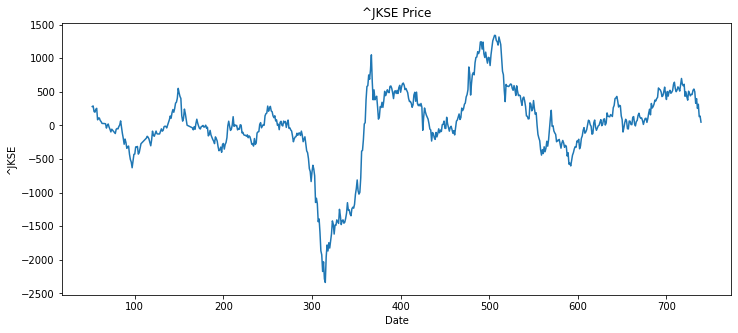

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

jkse["JKSE_sdiff"].plot(figsize=(12,5))
plt.title('^JKSE Price')
plt.xlabel("Date")
plt.ylabel("^JKSE")
plt.show()

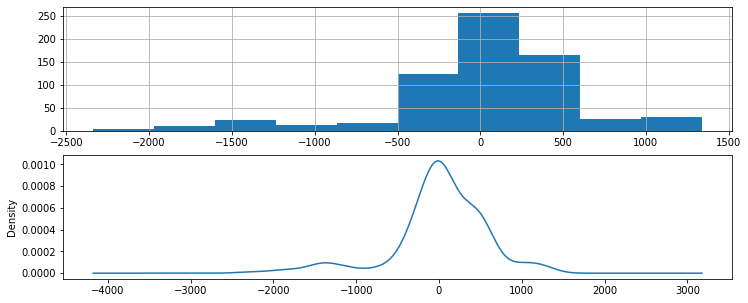

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,5))
jkse['JKSE_sdiff'].hist(ax=ax1)
jkse['JKSE_sdiff'].plot(kind='kde', ax=ax2)
plt.show()

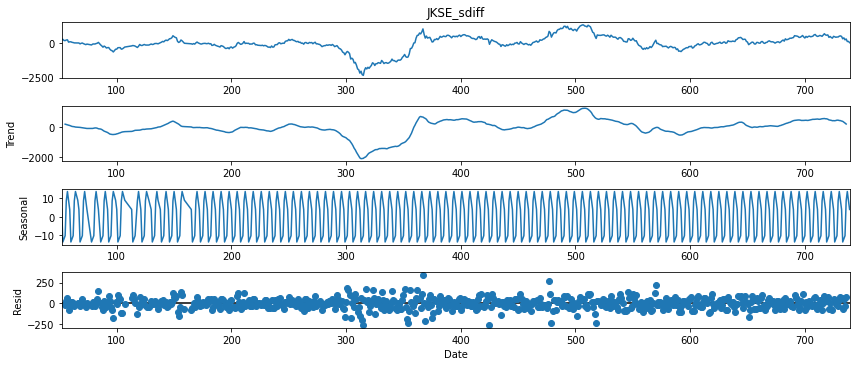

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

jkse_ts = pd.Series(jkse['JKSE_sdiff'].values, index=jkse['Date'])
decomposition = seasonal_decompose(jkse['JKSE_sdiff'], period=7, model='additive')
plt.rcParams['figure.figsize'] = 12, 5
decomposition.plot()
plt.xlabel("Date")
plt.show()

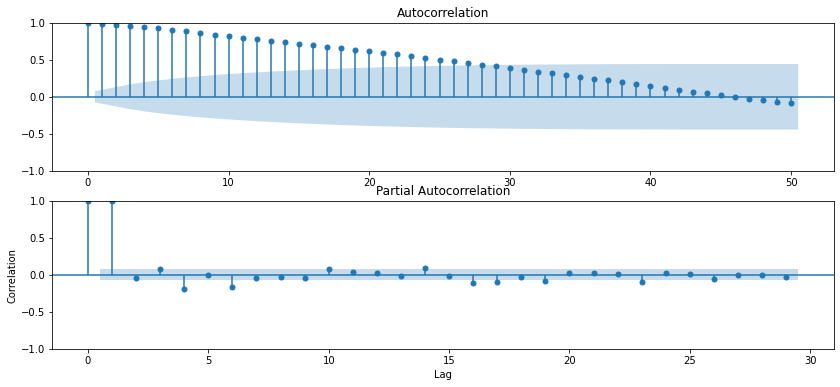

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,6), sharex=False, sharey=False)
ax1 = plot_acf(jkse_ts, lags=50, ax=ax1)
ax2 = plot_pacf(jkse_ts, ax=ax2)
plt.ylabel("Correlation")
plt.xlabel("Lag")
plt.show()

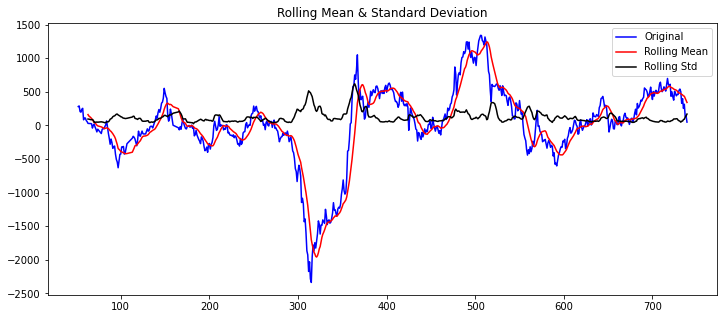

In [17]:
#Determing rolling statistics
rolmean = pd.Series(jkse['JKSE_sdiff']).rolling(window=12).mean()
rolstd = pd.Series(jkse['JKSE_sdiff']).rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(jkse['JKSE_sdiff'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [18]:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
jkse_test = adfuller(jkse_ts.values)

jkse_output = pd.Series(jkse_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in jkse_test[4].items():
    jkse_output['Critical Value (%s)'%key] = value
print(jkse_output)

Results of Dickey-Fuller Test:
Test Statistic                  -2.905508
p-value                          0.044711
#Lags Used                      16.000000
Number of Observations Used    649.000000
Critical Value (1%)             -3.440466
Critical Value (5%)             -2.866004
Critical Value (10%)            -2.569147
dtype: float64


In [19]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ",dftest[1])
    print("3. Num of Lags : ",dftest[2])
    print("4. Num of Observations Used for ADF Regression and Critical Value Calculation : ",dftest[3])
    print("5. Critical Value : ")
    for key, val in dftest[4].items():
        print('\t', key, ': ',val)

    if dftest[0] < dftest[4]['5%']:
        print("Data is Stationary")
    else:
        print("Data is not-Stationary")

In [20]:
ad_test(jkse['JKSE_sdiff'])

1. ADF :  -2.9055079237073502
2. P-Value :  0.04471123968684115
3. Num of Lags :  16
4. Num of Observations Used for ADF Regression and Critical Value Calculation :  649
5. Critical Value : 
	 1% :  -3.440466106307706
	 5% :  -2.8660036655537744
	 10% :  -2.569147085049656
Data is Stationary


In [21]:
import pmdarima as pm
model = pm.auto_arima(jkse_ts, d=1, D=1,
                      seasonal=True, m=52, start_p=0, start_q=0,
                      max_order=6, test='adf', stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=inf, Time=70.04 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=7976.200, Time=13.63 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=inf, Time=30.68 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=80.80 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=inf, Time=19.15 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=inf, Time=176.16 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=7977.880, Time=1.48 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=7977.819, Time=2.08 sec
 ARIMA(1,1,1)(0,1,0)[52]             : AIC=7965.930, Time=8.95 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=inf, Time=172.74 sec
 ARIMA(1,1,1)(0,1,1)[52]             : AIC=inf, Time=275.71 sec
 ARIMA(1,1,1)(1,1,1)[52]             : AIC=inf, Time=4640.38 sec
 ARIMA(2,1,1)(0,1,0)[52]             : AIC=7959.817, Time=19.26 sec
 ARIMA(2,1,1)(1,1,0)[52]             : AIC=7654.600, Time=58.50 sec
 ARIMA(2,1,1)(2,1,0)[52]             : AIC=

<AxesSubplot:>

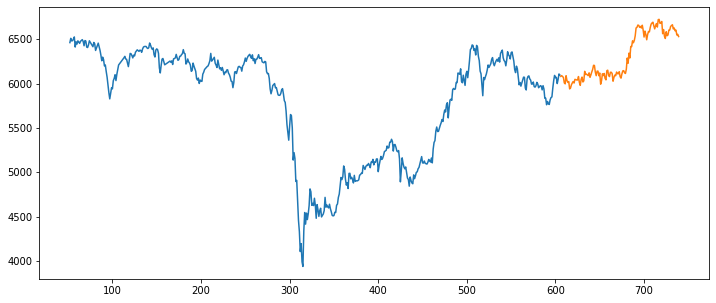

In [45]:
#divide into train and validation set
jkse_train = jkse[:int(0.8*(len(jkse_ts)))]
jkse_test = jkse[int(0.8*(len(jkse_ts))):]

#plotting the data
jkse_train['JKSE'].plot()
jkse_test['JKSE'].plot()

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(jkse_train['JKSE'],order=(2,1,1),seasonal_order=(1,1,0,52))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                JKSE   No. Observations:                  532
Model:             SARIMAX(2, 1, 1)x(1, 1, [], 52)   Log Likelihood               -2816.614
Date:                             Sat, 01 Jan 2022   AIC                           5643.228
Time:                                     11:07:21   BIC                           5664.087
Sample:                                          0   HQIC                          5651.428
                                             - 532                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6046      0.148     -4.087      0.000      -0.895      -0.315
ar.L2         -0.0658      0.043     -1.529      0.126      -0.150       0.019
ma.L1          0.6933      0.146      4.747      0.000       0.407       0.980
ar.S.L52      -0.4795      0.032    -14.844      0.000      -0.543      -0.416
sigma2      7296.3279    351.497     20.758      0.000    6607.406    7985.249
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                76.07
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.88   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

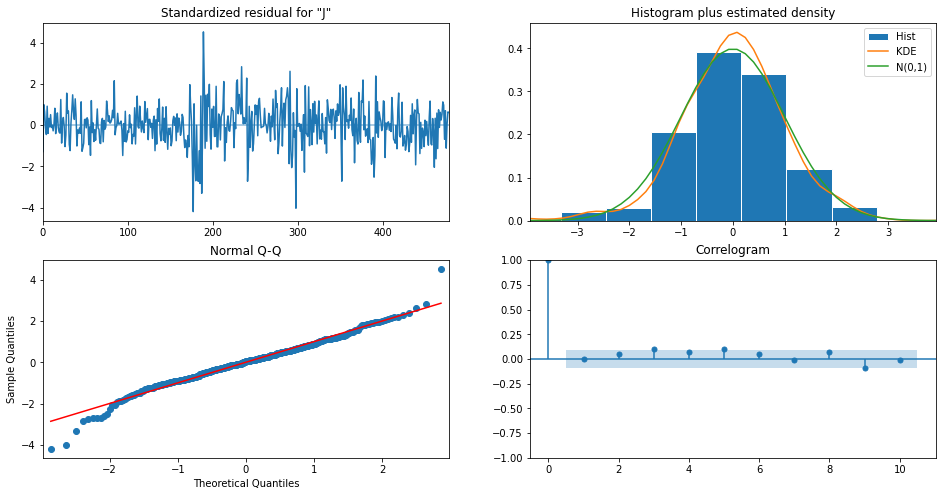

In [47]:
results.plot_diagnostics(figsize=(16, 8))
plt.savefig('modeldiagnostics')
plt.show()

In [48]:
forecast_object = results.get_forecast(steps=len(jkse_test['JKSE']))

mean = forecast_object.predicted_mean

conf_int = forecast_object.conf_int()

dates = mean.index

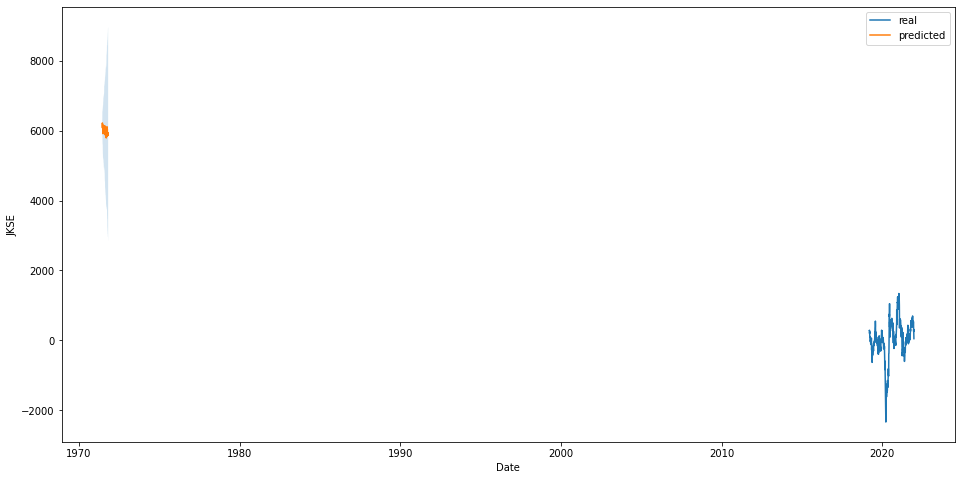

In [49]:
plt.figure(figsize=(16,8))

# Plot past CO2 levels
plt.plot(jkse_ts.index, jkse_ts, label='real')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1],alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.xlabel("Date")
plt.ylabel("JKSE")
plt.show()

In [50]:
start=len(jkse_train['JKSE'])
end=len(jkse_train['JKSE'])+len(jkse_test['JKSE'])-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMAX(2,1,1)(1,1,0,52) Predictions')

In [ ]:
len(jkse_test['JKSE'])

146

In [41]:
# Compare predictions to expected values
for i in jkse_test.index:
    print(f"predicted={predictions[i]:<11.10}, expected={jkse_test['JKSE'][i]}")
    

predicted=6181.996536, expected=6376.756836
predicted=6187.350022, expected=6290.798828
predicted=6219.066147, expected=6258.749023
predicted=6185.330013, expected=6248.464844
predicted=6305.229823, expected=6199.646973
predicted=6348.502993, expected=6264.679199
predicted=6363.662709, expected=6358.208984
predicted=6455.707021, expected=6324.258789
predicted=6487.645329, expected=6309.699219
predicted=6463.587476, expected=6277.228027
predicted=6457.119496, expected=6347.829102
predicted=6444.467182, expected=6356.160156
predicted=6491.684377, expected=6301.130859
predicted=6510.659814, expected=6252.711914
predicted=6525.045983, expected=6156.140137
predicted=6485.79313 , expected=6122.875977
predicted=6476.664886, expected=6195.562012
predicted=6483.563183, expected=6166.817871
predicted=6403.00136 , expected=6071.441895
predicted=6246.254311, expected=5985.521973
predicted=6314.671261, expected=6011.456055
predicted=6419.78889 , expected=5970.286133
predicted=6375.858101, expected=

KeyError: 666

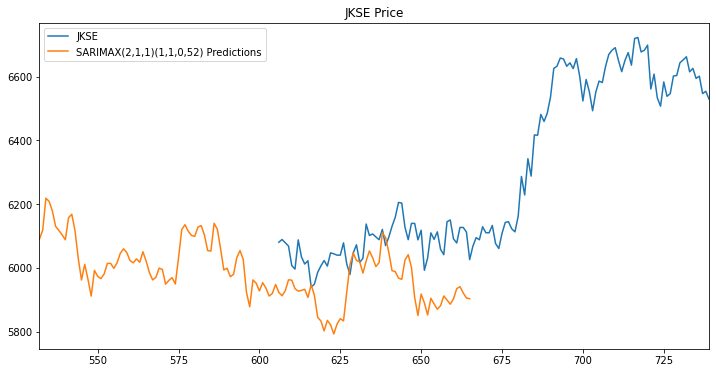

In [51]:
# Plot predictions against known values
title = 'JKSE Price'
ax = jkse_test['JKSE'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [54]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error, mean_absolute_percentage_error

r2_score(jkse_test['JKSE'], predictions)

-1.8979007174958769

In [55]:
import numpy as np

evaluation_results = pd.DataFrame({'r2_score': r2_score(jkse_test['JKSE'], predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(jkse_test['JKSE'], predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(jkse_test['JKSE'], predictions)
evaluation_results['mean_absolute_percentage_error'] = mean_absolute_percentage_error(jkse_test['JKSE'], predictions) 

evaluation_results

,r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
0,-1.897901,339.433572,196296.929829,0.052196


In [ ]:
df_jkse.head()

,Date,JKSE
1,2019-01-03,39.834961
2,2019-01-04,53.530273
3,2019-01-07,12.684082
4,2019-01-08,-24.376953
5,2019-01-09,9.390625


In [23]:
jkse.to_csv('jkse2.csv',index=False)